In [82]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import contextily as ctx
from shapely.geometry import box

In [63]:
# display all column when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:
states = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')
states.columns = states.columns.str.lower()
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


<AxesSubplot:>

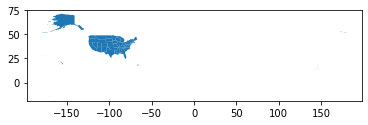

In [3]:
states.plot()

In [4]:
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


<AxesSubplot:>

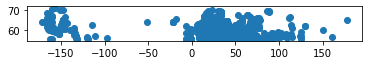

In [5]:
communities.plot()

In [6]:
print(communities.crs)
print(states.crs)

epsg:4326
epsg:4269


<AxesSubplot:>

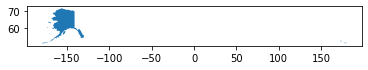

In [7]:
alaska = states[states.name =='Alaska']
alaska.plot()

<AxesSubplot:>

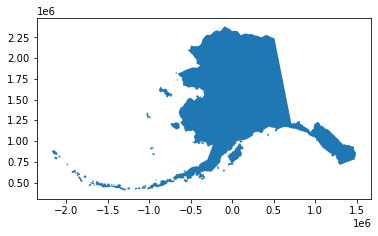

In [8]:
# add info about this CRS
alaska = alaska.to_crs('epsg:3338')
alaska.plot()

In [9]:
alaska.crs.is_projected

True

<AxesSubplot:>

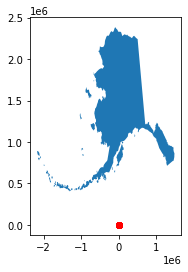

In [10]:
# Trouble: not in the same CRS
fig, ax = plt.subplots()

alaska.plot(ax=ax)
communities.plot(ax=ax, color='red')

In [11]:
communities = communities.to_crs(alaska.crs)
communities.crs == alaska.crs

True

<AxesSubplot:>

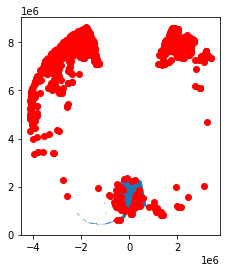

In [12]:
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots()

alaska.plot(ax=ax)
communities.plot(ax=ax, color='red')

In [13]:
ak_comms = gpd.clip(communities,alaska)
ak_comms

,name,population,country,geoname-id,geometry
1298,King Cove,938,US,5866308,POINT (-530099.545 594133.440)
1326,Sand Point,976,US,5873349,POINT (-411560.244 611742.064)
1261,Metlakatla,1405,US,5555695,POINT (1403355.130 807737.504)
1267,Craig,1201,US,5845544,POINT (1296182.920 812340.936)
1260,Klawock,755,US,5554566,POINT (1296722.624 821399.692)
...,...,...,...,...,...
1320,Point Hope,674,US,5871791,POINT (-526210.963 2093579.704)
1315,Nuiqsut,3402,US,5870441,POINT (116301.889 2251323.295)
1321,Prudhoe Bay,2174,US,5872126,POINT (217275.285 2262083.249)
1342,Wainwright,556,US,5877543,POINT (-227854.290 2304942.804)


<AxesSubplot:>

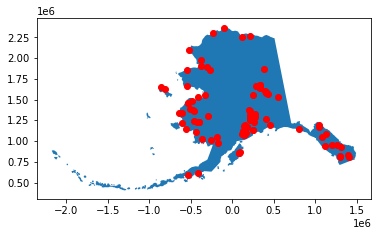

In [14]:
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_comms.plot(ax=ax, color='red')

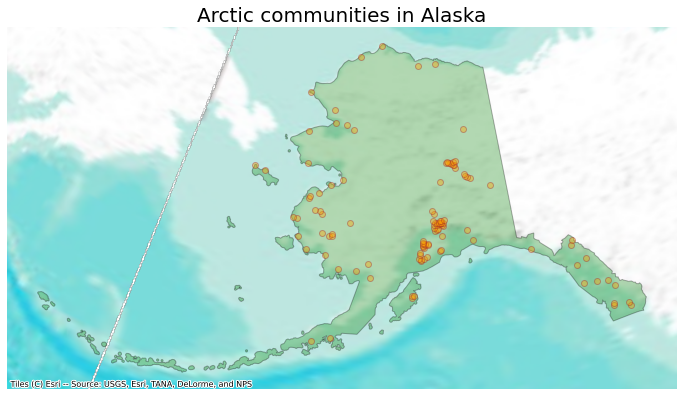

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
# --------------------------
ax.axis('off')
ax.set_title('Arctic communities in Alaska',
             fontsize=20)
# --------------------------
alaska.plot(ax=ax, 
            color = 'green',
            alpha=0.3,
            edgecolor='black')
ak_comms.plot(ax=ax,  
              edgecolor='brown',
              color='orange',
              alpha=0.4)

# --------------------------
# add basemap
ctx.add_basemap(ax, 
                crs=alaska.crs.to_string(),
                 source= ctx.providers.Esri.WorldTerrain)

In [50]:
places = gpd.read_file('ne_50m_populated_places_simple/ne_50m_populated_places_simple.shp')
places.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,...,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,...,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


<AxesSubplot:>

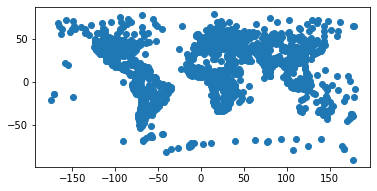

In [51]:
places.plot()

In [52]:
ak_places = gpd.clip(places.to_crs(alaska.crs),alaska)
ak_places

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
764,3,110,1,Populated place,Cold Bay,None,None,Cold Bay,0,0,...,200,108,0.0,1,1,None,Cold Bay,5.0,1159150541,POINT (-553201.466 612732.247)
763,3,110,1,Populated place,Kodiak,None,None,Kodiak,0,0,...,9461,6148,9122.0,5,5,None,Kodiak,5.0,1159150539,POINT (94470.762 866399.197)
215,4,50,1,Populated place,Sitka,None,None,Sitka,0,0,...,8931,7289,0.0,5,5,None,Sitka,5.1,1159149319,POINT (1115512.589 941665.222)
770,3,110,1,Admin-1 capital,Juneau,None,None,Juneau,0,0,...,30711,21633,0.0,7,7,None,Juneau,4.0,1159150555,POINT (1128929.841 1090424.979)
765,3,110,1,Populated place,Bethel,None,None,Bethel,0,0,...,6228,4653,0.0,5,4,None,Bethel,5.0,1159150543,POINT (-419821.224 1225558.907)
1080,2,200,1,Populated place,Anchorage,None,None,Anchorage,0,0,...,260283,243853,0.0,10,10,None,Anchorage,3.0,1159151249,POINT (220064.767 1254886.849)
769,3,110,1,Populated place,Valdez,None,None,Valdez,0,0,...,4036,2530,0.0,4,4,None,Valdez,5.0,1159150553,POINT (409805.897 1262980.440)
768,3,110,1,Populated place,Nome,None,None,Nome,0,0,...,3485,2557,2450.0,4,4,None,Nome,4.0,1159150551,POINT (-544875.137 1662874.547)
771,3,110,1,Populated place,Fairbanks,None,None,Fairbanks,0,0,...,56993,30224,0.0,8,7,None,Fairbanks,4.0,1159150557,POINT (297978.605 1666997.434)
766,3,110,1,Populated place,Point Hope,None,None,Point Hope,0,0,...,461,461,0.0,2,2,None,Point Hope,5.0,1159150547,POINT (-529220.980 2094066.281)


<AxesSubplot:>

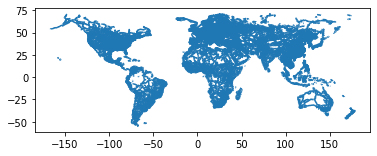

In [61]:
roads = gpd.read_file('ne_10m_roads/ne_10m_roads.shp')
roads.plot()

<AxesSubplot:>

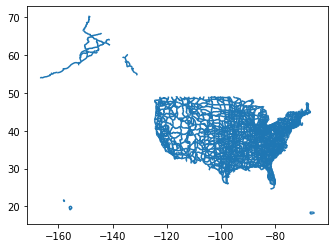

In [65]:
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

<AxesSubplot:>

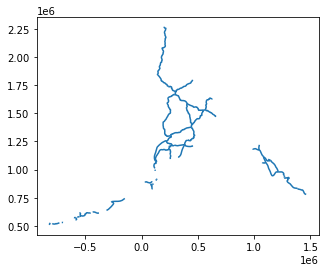

In [70]:
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs),alaska)

In [99]:
ak_roads.head()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
1078,7,Ferry,Ferry Route,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,111,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,308605,North America,0,Ferry,7.0,9.5,"LINESTRING (1386318.569 829171.762, 1396881.58..."
477,7,Ferry,Ferry Route,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,725,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,6905,North America,0,Ferry,7.0,9.5,"MULTILINESTRING ((-264845.282 715378.536, -246..."
3233,7,Ferry,Ferry Route,USA,None,New in version 2.0.0,None,None,None,None,0,1,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,308705,North America,0,Ferry,7.0,9.5,"LINESTRING (1385272.645 829831.314, 1386318.56..."
1057,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,63,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Other,7.1,9.6,"LINESTRING (79873.130 874903.558, 82789.958 86..."
1056,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,18,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Other,7.1,9.6,"LINESTRING (88344.609 863831.825, 89881.249 86..."


<AxesSubplot:>

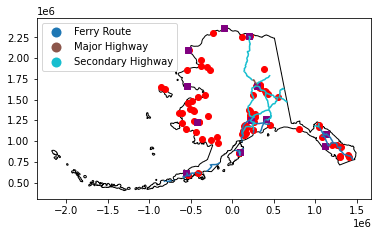

In [98]:
# https://matplotlib.org/stable/api/markers_api.html
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots(figsize=(12,8))
# --------------------------
ax.axis('off')
ax.set_title('Roads and populated places in Alaska',
             fontsize=20)

alaska.plot(ax=ax, color='none', edgecolor='black')
ak_roads.plot(ax=ax, column='type', legend=True)
ak_comms.plot(ax=ax, color='red')
ak_places.plot(ax=ax, color='purple', marker='s')


In [81]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520816])

In [90]:
bbox = box(*alaska.total_bounds)

In [91]:
type(bbox)

shapely.geometry.polygon.Polygon

In [93]:
ak_bbox = gpd.GeoDataFrame(geometry=[bbox],
crs=alaska.crs)
ak_bbox

,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


<AxesSubplot:>

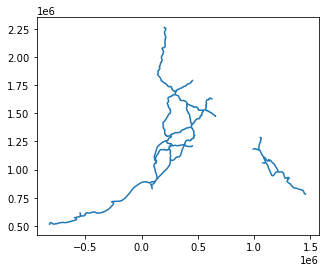

In [96]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)
ak_complete_roads.plot()

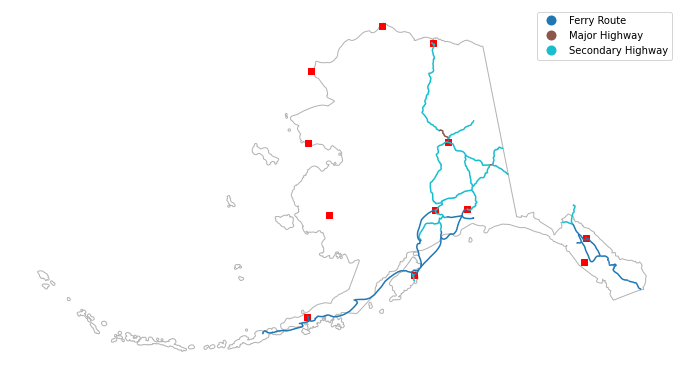

In [114]:
# https://matplotlib.org/stable/api/markers_api.html
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots(figsize=(12,8))
# --------------------------
ax.axis('off')

alaska.plot(ax=ax, color='none', edgecolor='0.7')
ak_complete_roads.plot(ax=ax, column='type', legend=True)
#ak_comms.plot(ax=ax, color='red')
ak_places.plot(ax=ax, color='red', marker='s')

# --------------------------

plt.show()

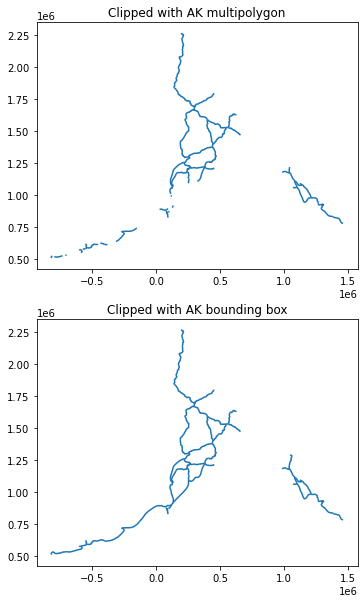

In [119]:
# two rows, one column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax=ax2)
ax2.set_title('Roads clipped with AK bounding box')

#plt.axis('equal')
plt.show()